In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense, Dropout, Activation, Flatten
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from itertools import product

In [22]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2,rotation_range=40,fill_mode='nearest', horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)
validation_data = ImageDataGenerator(rescale = 1./255)
training_set = train_data.flow_from_directory('Training',target_size = (64, 64),color_mode='rgb',class_mode = 'categorical')
test_set = test_data.flow_from_directory('Testing',target_size = (64,64),color_mode='rgb',class_mode = 'categorical')
validation_set = validation_data.flow_from_directory('Validation',target_size = (64,64),color_mode='rgb',class_mode = 'categorical')

Found 3520 images belonging to 62 classes.
Found 2455 images belonging to 62 classes.
Found 1016 images belonging to 62 classes.


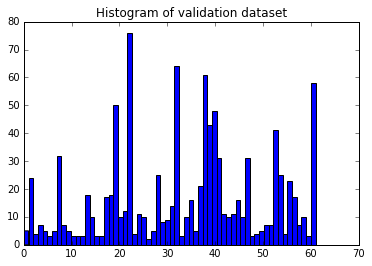

In [7]:
plt.hist(validation_set.classes, bins=62)  # arguments are passed to np.histogram
plt.title("Histogram of validation dataset")
plt.show()

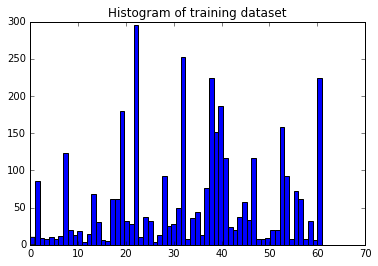

In [8]:
plt.hist(training_set.classes, bins=62)  # arguments are passed to np.histogram
plt.title("Histogram of training dataset")
plt.show()

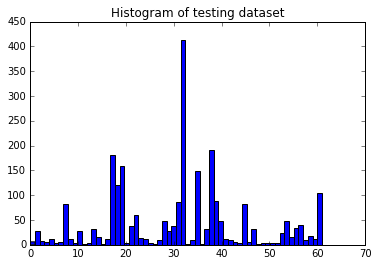

In [9]:
plt.hist(test_set.classes, bins=62)  # arguments are passed to np.histogram
plt.title("Histogram of testing dataset")
plt.show()

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(40,40)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
model = load_model('classifier_augmentation1.h5')

In [27]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
__________

True

In [29]:
score = model.evaluate_generator(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.0019566127273541933
Test accuracy: 0.9226069247407


In [49]:
import os
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image

list_of_classes = os.listdir("Testing")
print(list_of_classes)
L_listing = []
num_samples = 0
for i in list_of_classes:
    if "txt" not in i: 
        listing = os.listdir("Testing"+'/'+i)
        num_samples += len(listing)
        L_listing.append(listing)
        
y_test = []    
img_test = []
i = 0
for listing in L_listing:
    for file in listing:
        if("csv" not in file):
            test_image = image.load_img("Testing" + '/' + list_of_classes[i] + '/' +  file, target_size = (64, 64))
            test_image = image.img_to_array(test_image) 
            test_image = test_image/255.
            img_test.append(test_image)
            y_test.append(list_of_classes[i]) 
    i += 1   
Y_test = y_test
y_test = to_categorical(y_test, num_classes=num_classes)
print(y_test[455])

X_test = np.array(img_test)
y_test = np.array(y_test)

['00050', '00016', '00027', '00025', '00035', '00034', '00014', '00056', '00060', '00038', '00023', '00033', '00015', '00032', '00007', '00051', '00054', '00048', '00045', '00031', '00026', '00005', '00018', '00043', '00012', '00047', '00013', '00059', '00028', '00019', '00061', '00037', '00029', '00052', '00003', '00011', '00000', '00020', '00004', '00008', '00036', '00046', '00017', '00041', '00002', '00055', '00001', '00049', '00044', '00039', '00022', '00058', '00024', '00006', '00042', '00053', '00040', '00010', '00030', '00021', '00009', '00057']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
labels = ["Uneven road", "Speed bump", "Slippery road", "Dangerous curve to the left", "Dangerous curve to the right", "Double dangerous curve to the left", "Double dangerous curve to the right", "Presence of children", "Bicycle crossing", "Cattle crossing", "Road works ahead", "Traffic signals ahead", "Guarded railroad crossing", "Indefinite danger", "Road narrows", "Road narrows from the left", "Road narrows from the right", "Priority at the next intersection", "Intersection where the priority from the right is applicable", "Yield right of way", "Yield to oncoming traffic", "Stop", "No entry for all drivers", "No bicycles allowed", "Maximum weights allowed (including load)", "No cargo vehicles allowed", "Maximum width allowed", "Maximum height allowed", "No traffic allowed in both directions", "No left turn", "No right turn", "No passing to the left vehicles having more than 2 wheels and horse drawn vehicles", "Maximum speed limit", "Mandatory way for pedestrians and bicycles", "Mandatory direction (straight on)", "Mandatory direction (to the right or to the left)", "Mandatory directions(straight on and to the right)", "Mandatory traffic circle", "Mandatory bicycle path", "Path shared between pedestrians, bicycles and mopeds class A", "No parking", "No waiting or parking", "No parking from the 1 st to the 15th of the month", "No parking from the 16th till the end of the month", "Priority over oncoming traffic", "Parking allowed", "Additional parking sign for handicap only", "Parking exclusively for motorcars", "Parking exclusively for trucks", "Parking exclusively for buses/coaches", "Parking on sidewalk or verge mandatory", "Beginning of a residential area", "End of a residential area", "One way traffic", "Dead end", "End of road works", "Pedestrian crosswalk", "Bicycles and mopeds crossing", "Parking ahead", "Speed bump", "End of priority road", "Priority road"]

In [50]:
y_pred =  model.predict(X_test)
acc = np.sum(y_pred==y_test)/np.size(y_pred)
print("Test accuracy = {}".format(acc))

Test accuracy = 0.0042244267787924575


Normalized confusion matrix
[[0.         0.16666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.03703704]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05882353 0.         ... 0.         0.         0.05882353]
 [0.         0.         0.         ... 0.         0.         0.09090909]
 [0.         0.00952381 0.         ... 0.00952381 0.         0.04761905]]


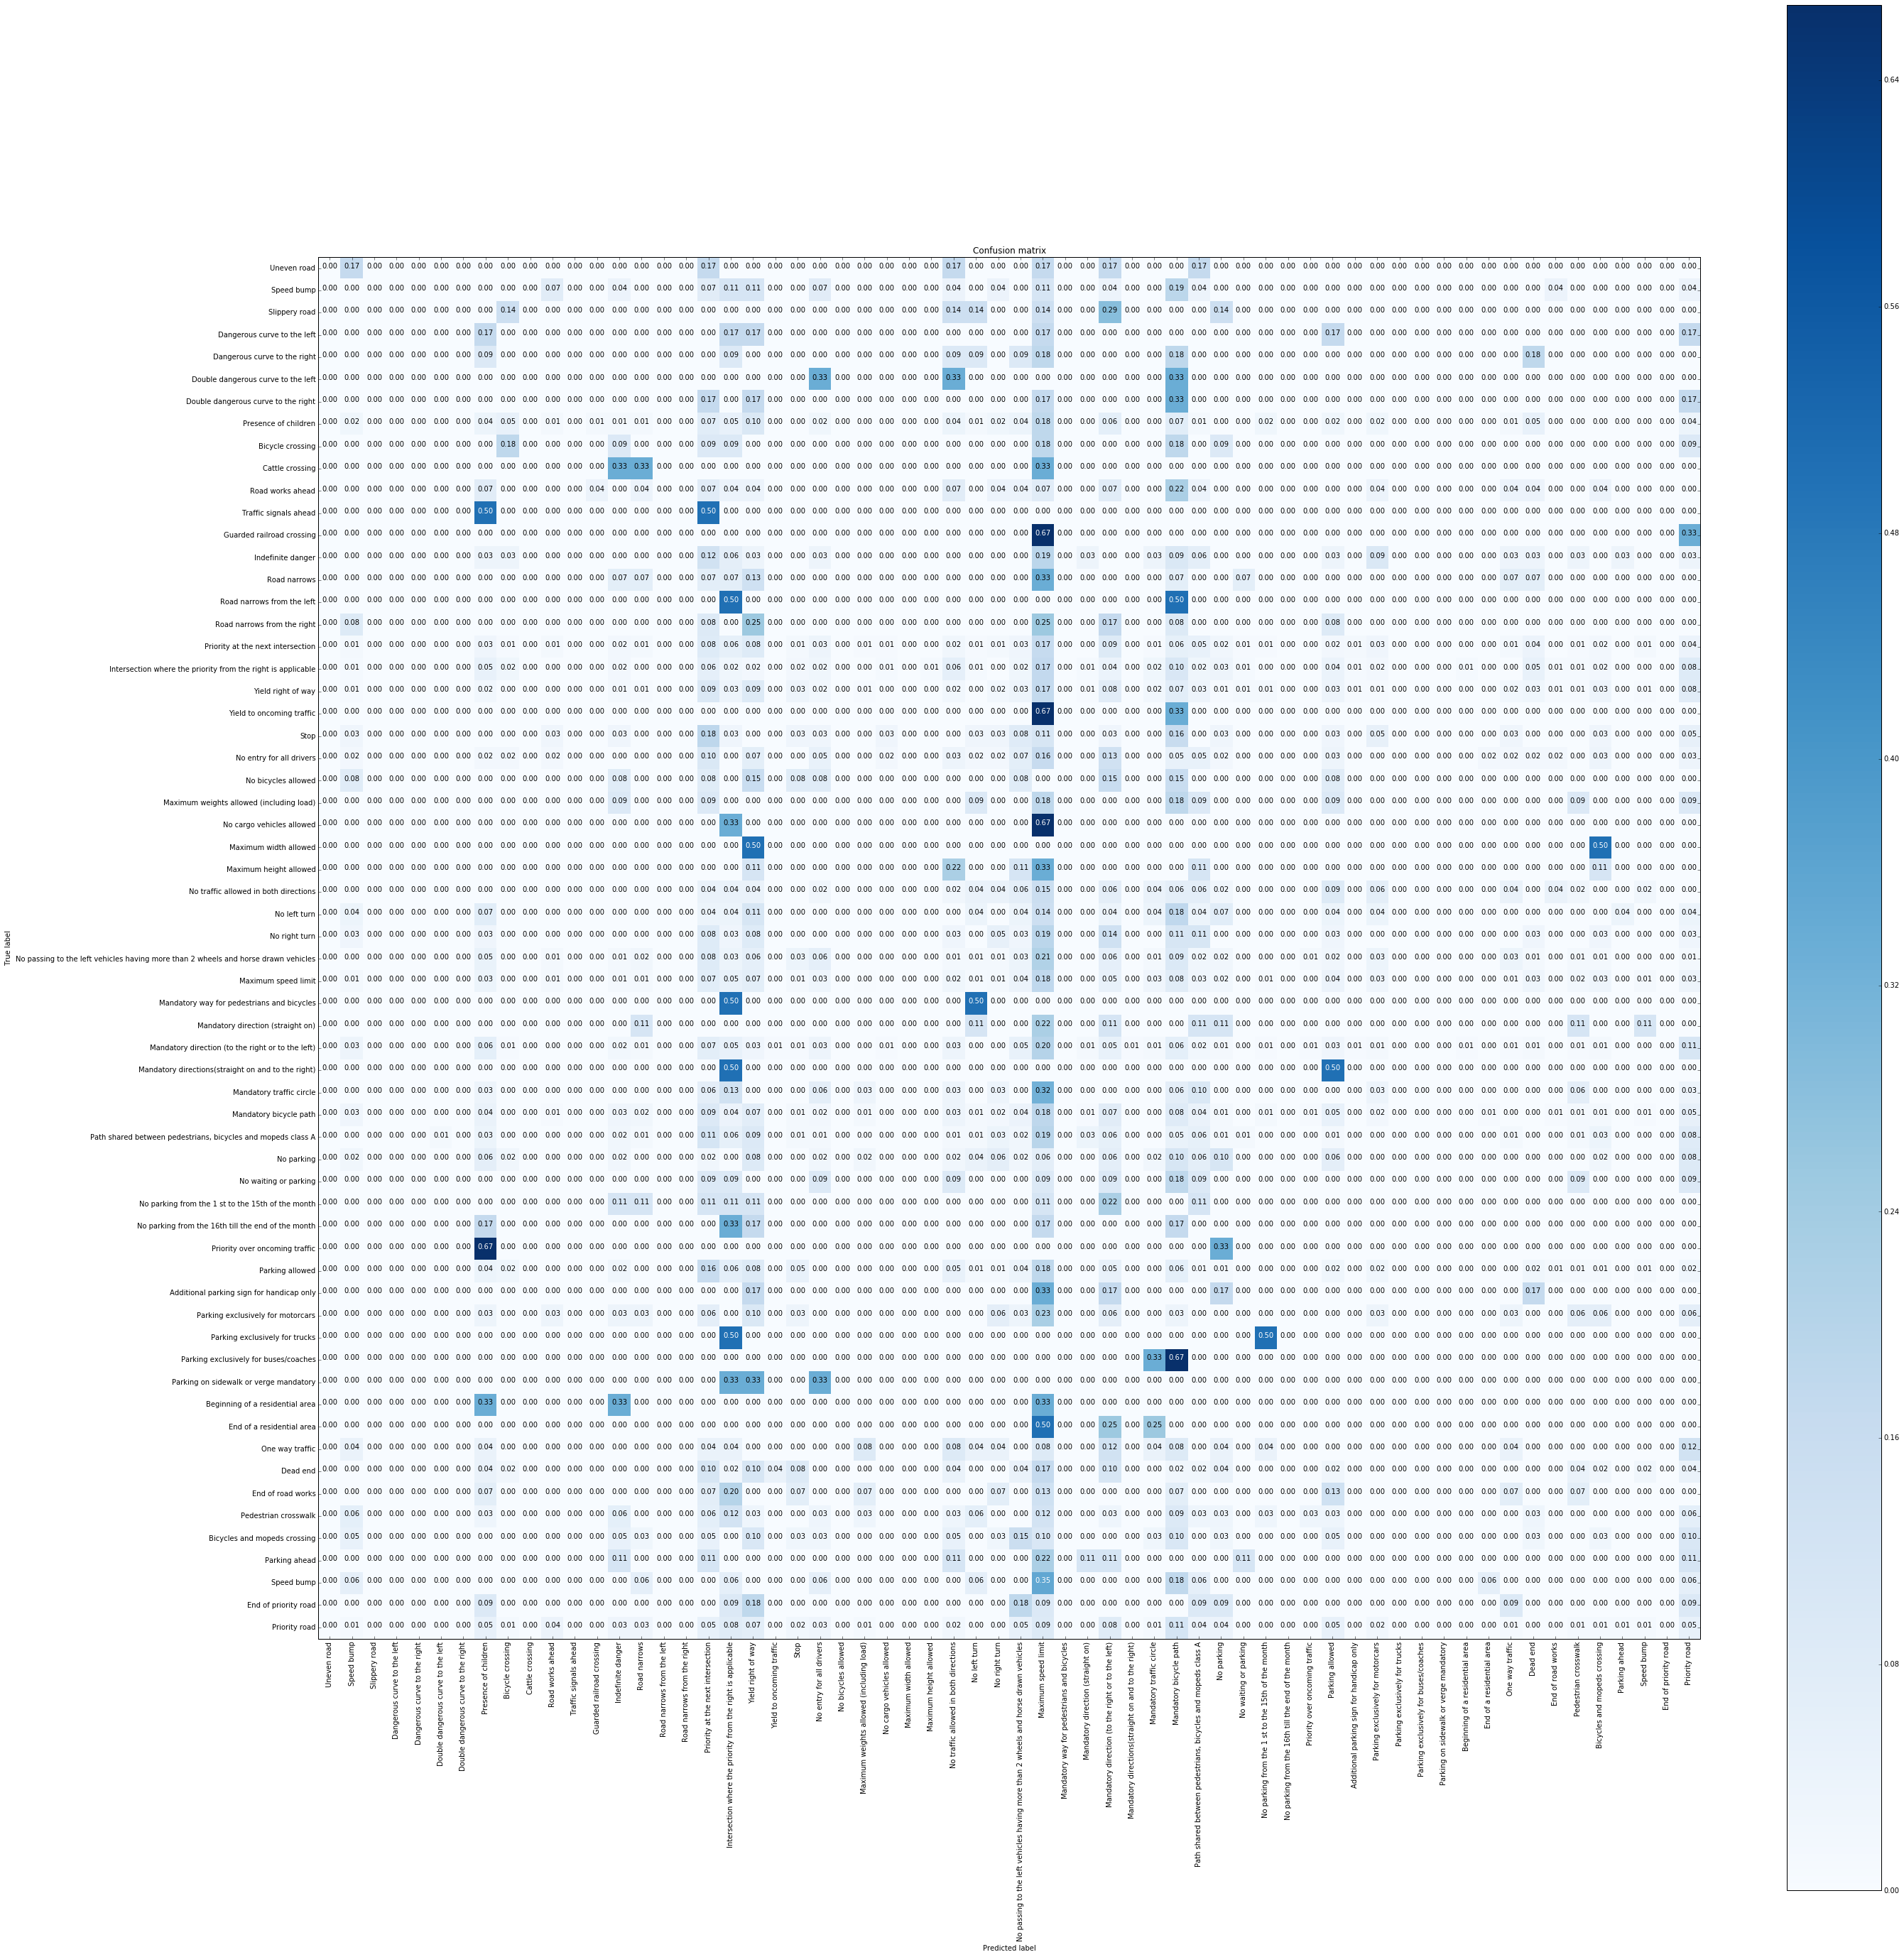

In [51]:
test_set.reset()
probabilities  = model.predict_generator(test_set)
y_pred = np.argmax(probabilities , axis=-1)

cnf_matrix = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cnf_matrix, labels, True)